   <span style="color:green; font-size:30px">  BANK TELEMARKETING EDA USING PYTHON  </span>

In [5]:
import pandas as pd
import os
Marketfile=os.path.join(r"C:\Users\pabba\OneDrive\Documents\Python Data Analysis\Python Project\bank_marketing_updated.xlsx")
TeleMarketingAnalysis=pd.read_excel(Marketfile)
TeleMarketingAnalysis.head()

,customerid,age,salary,balance,marital,job,education,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,management,tertiary,yes,no,yes,no,unknown,5,2017-05-01,261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,technician,secondary,yes,no,yes,no,unknown,5,2017-05-01,151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,entrepreneur,secondary,yes,no,yes,yes,unknown,5,2017-05-01,76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,blue-collar,unknown,no,no,yes,no,unknown,5,2017-05-01,92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,unknown,unknown,no,no,no,no,unknown,5,2017-05-01,198 sec,1,-1,0,unknown,no


1. Understanding the Dataset
a. Load and scrutinize the dataset to comprehend its structure,
encompassing columns and data types.


In [7]:
TeleMarketingAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   customerid  45211 non-null  int64         
 1   age         45191 non-null  float64       
 2   salary      45211 non-null  int64         
 3   balance     45211 non-null  int64         
 4   marital     45211 non-null  object        
 5   job         45211 non-null  object        
 6   education   45211 non-null  object        
 7   targeted    45211 non-null  object        
 8   default     45211 non-null  object        
 9   housing     45211 non-null  object        
 10  loan        45211 non-null  object        
 11  contact     45211 non-null  object        
 12  day         45211 non-null  int64         
 13  month       45161 non-null  datetime64[ns]
 14  duration    45211 non-null  object        
 15  campaign    45211 non-null  int64         
 16  pdays       45211 non-

b. Inspect for any instances of missing values, outliers, or data
inconsistencies.


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_values = TeleMarketingAnalysis.isnull().sum()

# Identify outliers in numerical columns
numerical_cols = TeleMarketingAnalysis.select_dtypes(include=['int64', 'float64']).columns
outliers = {}
for col in numerical_cols:
    q1 = TeleMarketingAnalysis[col].quantile(0.25)
    q3 = TeleMarketingAnalysis[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[col] = TeleMarketingAnalysis[(TeleMarketingAnalysis[col] < lower_bound) | (TeleMarketingAnalysis[col] > upper_bound)].shape[0]

    
# Check for data inconsistencies
inconsistencies = TeleMarketingAnalysis.nunique()

# Display missing values and outliers
missing_values, outliers,inconsistencies



(customerid          0
 age                 0
 salary              0
 balance             0
 marital             0
 job                 0
 education           0
 targeted            0
 default             0
 housing             0
 loan                0
 contact             0
 day                 0
 date                0
 duration            0
 campaign            0
 pdays               0
 previous            0
 poutcome            0
 response            0
 month               0
 day_of_week         0
 age_group          20
 income_category     0
 dtype: int64,
 {'customerid': 0,
  'salary': 0,
  'balance': 4729,
  'day': 0,
  'campaign': 3064,
  'pdays': 8257,
  'previous': 8257},
 customerid         45211
 age                   78
 salary                11
 balance             7168
 marital                3
 job                   12
 education              4
 targeted               2
 default                2
 housing                2
 loan                   2
 contact                

2. Descriptive Statistics
a. Derive summary statistics (mean, median, standard deviation) for relevant
columns.

In [8]:
TeleMarketingAnalysis.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


b. Examine the distribution of the target variable, indicating responses to the
term deposit campaign.

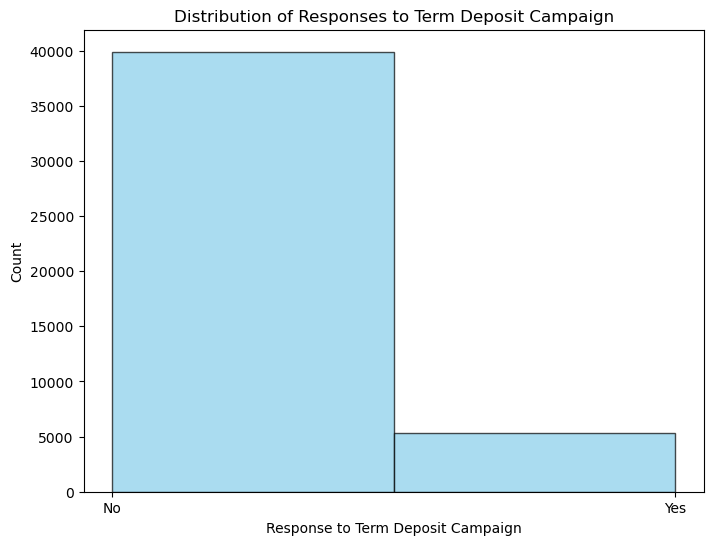

In [9]:
TeleMarketingAnalysis['response'] = TeleMarketingAnalysis['response'].map({'yes': 1, 'no': 0})

import matplotlib.pyplot as plt

# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
plt.hist(TeleMarketingAnalysis['response'], bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Response to Term Deposit Campaign')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Distribution of Responses to Term Deposit Campaign')
plt.show()

The histogram now correctly shows the count of responses categorized as 'No' and 'Yes'.

3. UNIVARIATE ANALYSIS
a. Examine the distribution of individual key features, such as age, balance,
and call duration.
b. Employ visual aids like histograms, box plots, and kernel density plots to
discern patterns and outliers.

4. BIVARIATE ANALYSIS
a. Evaluate the relationship between independent variables and the target
variable.


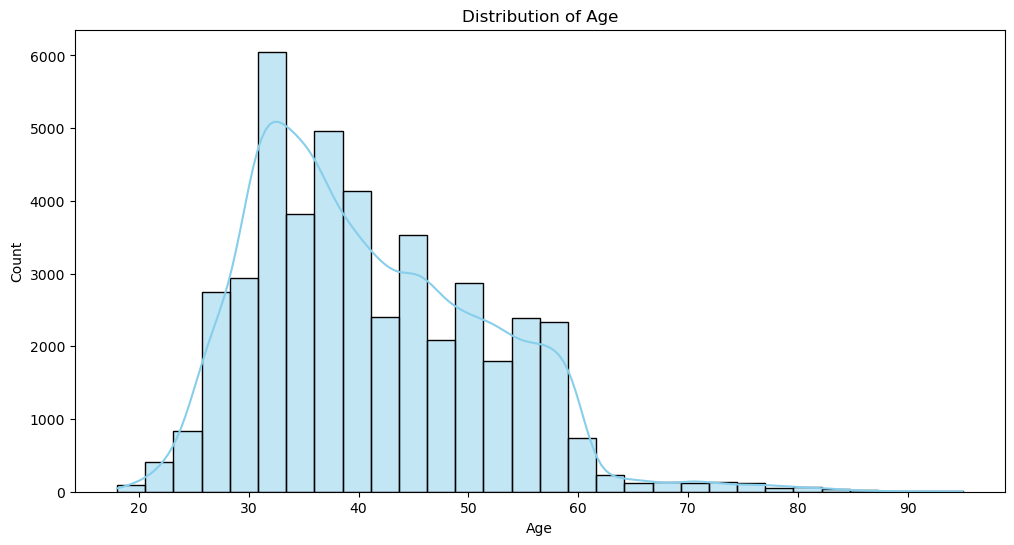

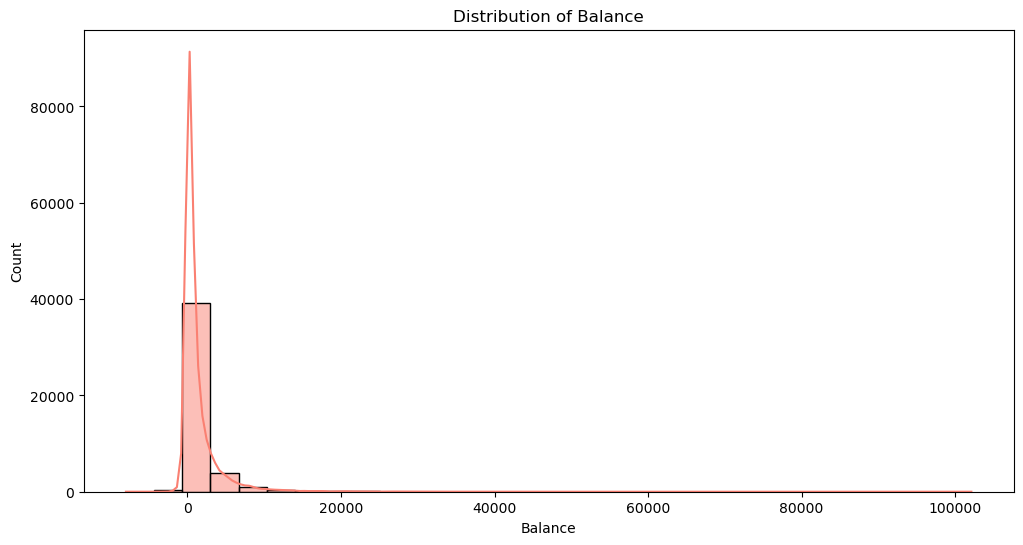

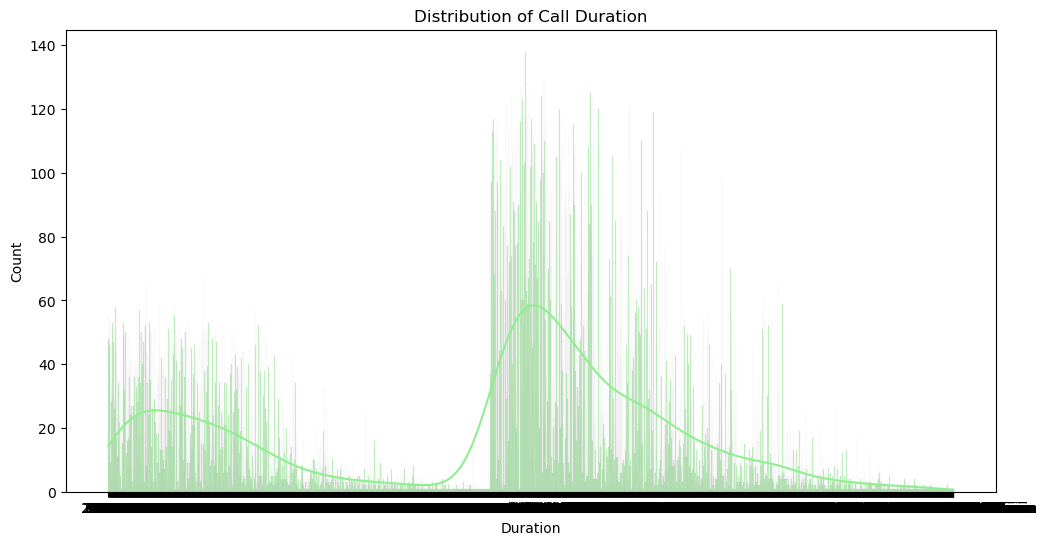

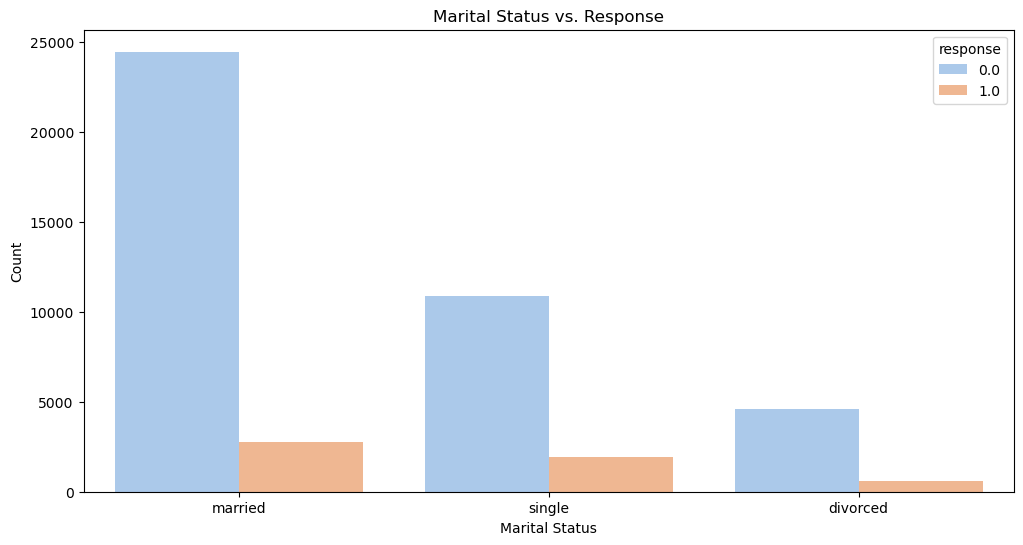

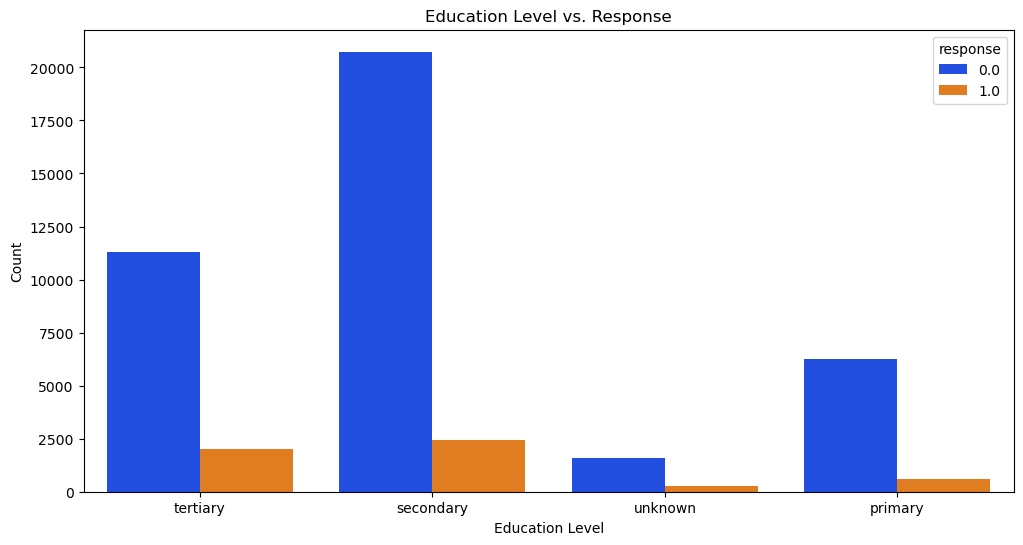

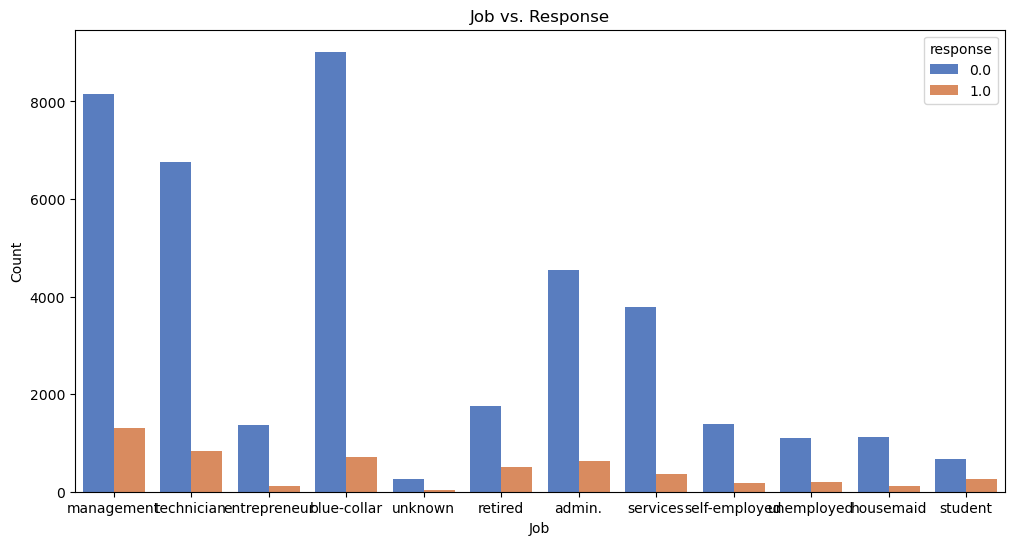

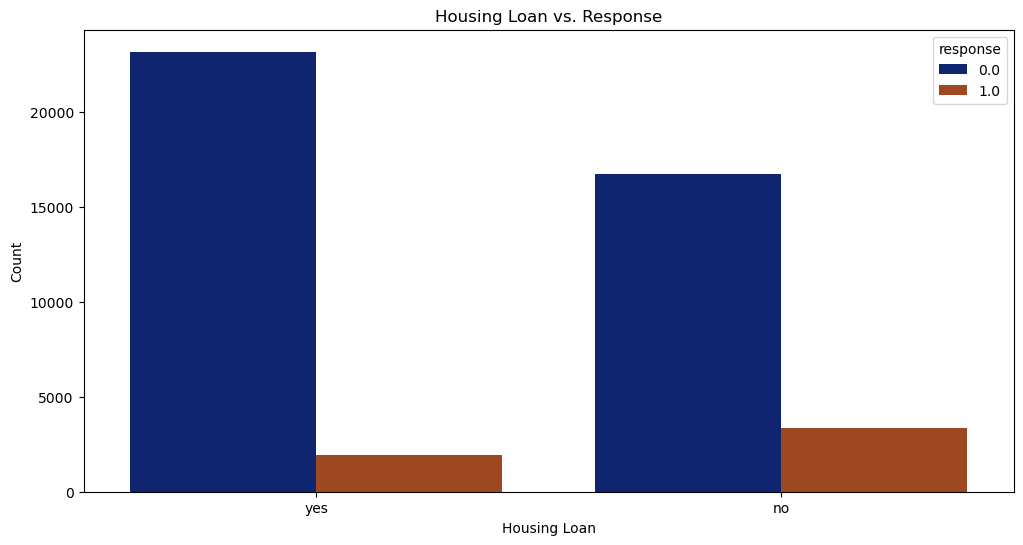

In [11]:
# Examine the distribution of key features--->UNIVARIATE ANALYSIS
plt.figure(figsize=(12, 6))
sns.histplot(TeleMarketingAnalysis['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(TeleMarketingAnalysis['balance'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(TeleMarketingAnalysis['duration'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Call Duration')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

# Evaluate the relationship between independent variables and the target variable--->BIVARIATE ANALYSIS
plt.figure(figsize=(12, 6))
sns.countplot(x='marital', hue='response', data=TeleMarketingAnalysis, palette='pastel')
plt.title('Marital Status vs. Response')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='response', data=TeleMarketingAnalysis, palette='bright')
plt.title('Education Level vs. Response')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='response', data=TeleMarketingAnalysis, palette='muted')
plt.title('Job vs. Response')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='housing', hue='response', data=TeleMarketingAnalysis, palette='dark')
plt.title('Housing Loan vs. Response')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.show()

b. Analyze how features like age, job type, education, marital status, etc.,
associate with the success of the term deposit campaign, using
visualizations like bar charts, stacked bar charts, and heatmaps.


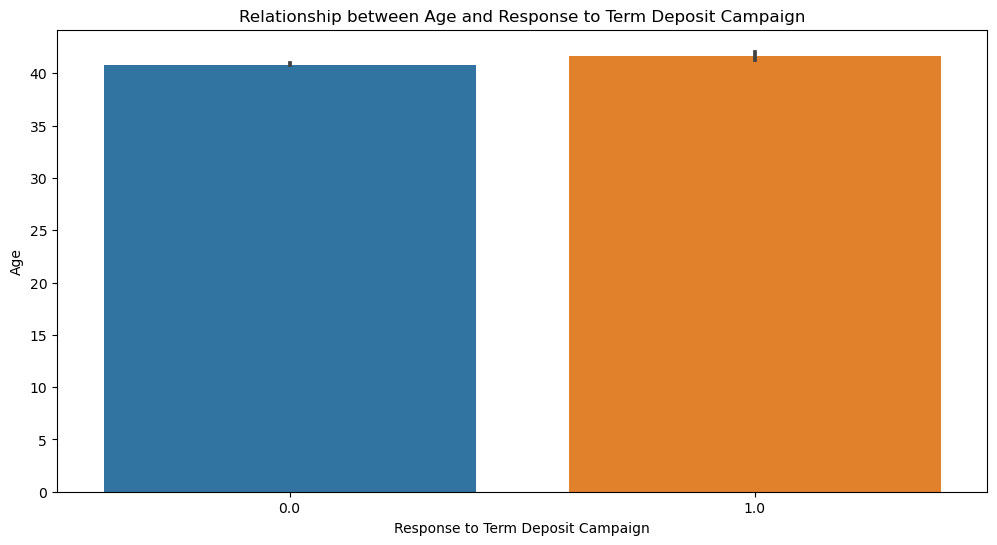

In [12]:
import seaborn as sns

# Relationship between age and response to term deposit campaign
plt.figure(figsize=(12, 6))
sns.barplot(x='response', y='age', data=TeleMarketingAnalysis)
plt.xlabel('Response to Term Deposit Campaign')
plt.ylabel('Age')
plt.title('Relationship between Age and Response to Term Deposit Campaign')
plt.show()

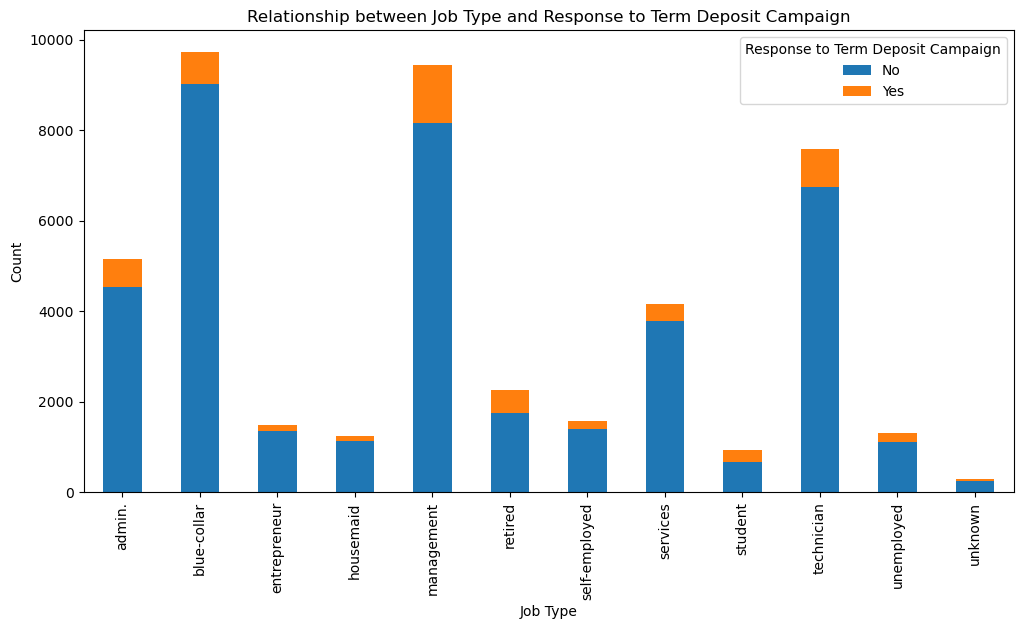

In [13]:
import matplotlib.pyplot as plt

# Relationship between job type and response to term deposit campaign
job_response = TeleMarketingAnalysis.groupby(['job', 'response']).size().unstack()
job_response.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Relationship between Job Type and Response to Term Deposit Campaign')
plt.legend(title='Response to Term Deposit Campaign', labels=['No', 'Yes'])
plt.show()

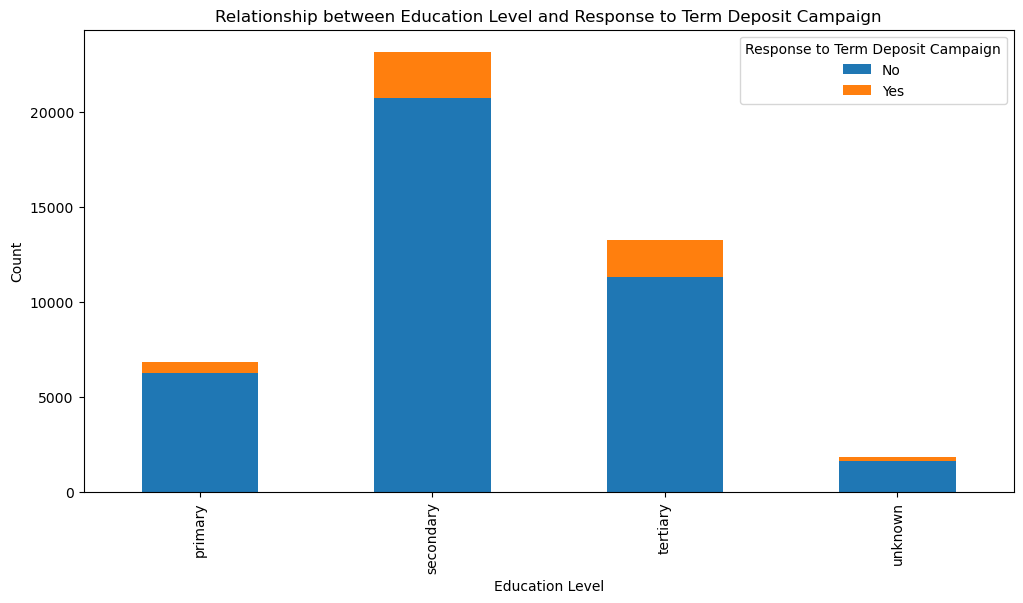

In [14]:
import matplotlib.pyplot as plt

# Relationship between education level and response to term deposit campaign
edu_response = TeleMarketingAnalysis.groupby(['education', 'response']).size().unstack()
edu_response.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Relationship between Education Level and Response to Term Deposit Campaign')
plt.legend(title='Response to Term Deposit Campaign', labels=['No', 'Yes'])
plt.show()

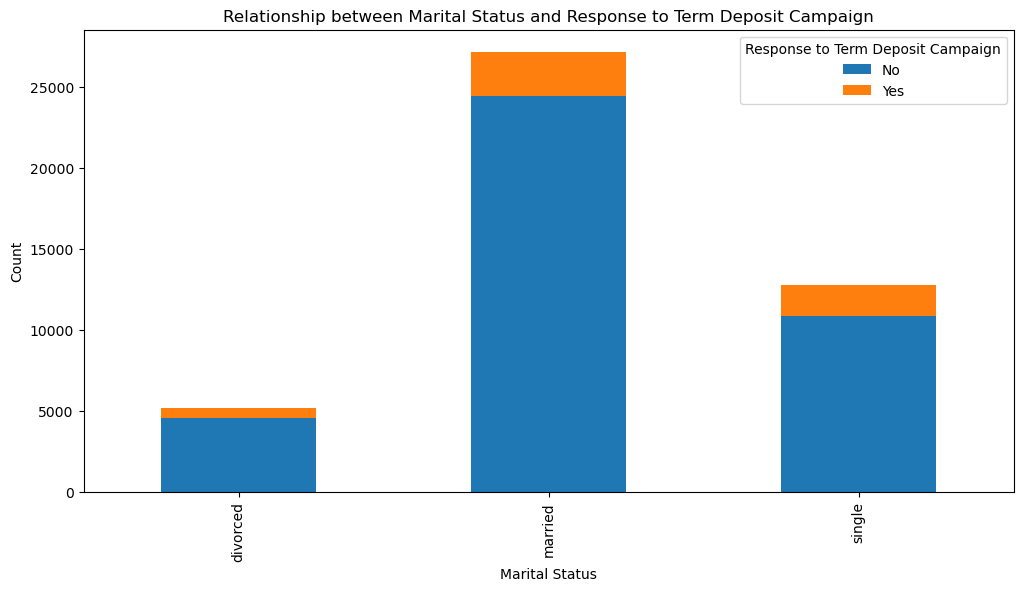

In [15]:
import matplotlib.pyplot as plt

# Relationship between marital status and response to term deposit campaign
marital_response = TeleMarketingAnalysis.groupby(['marital', 'response']).size().unstack()
marital_response.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Relationship between Marital Status and Response to Term Deposit Campaign')
plt.legend(title='Response to Term Deposit Campaign', labels=['No', 'Yes'])
plt.show()

C:\Users\pabba\AppData\Local\Temp\ipykernel_18768\461238345.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = TeleMarketingAnalysis.corr()


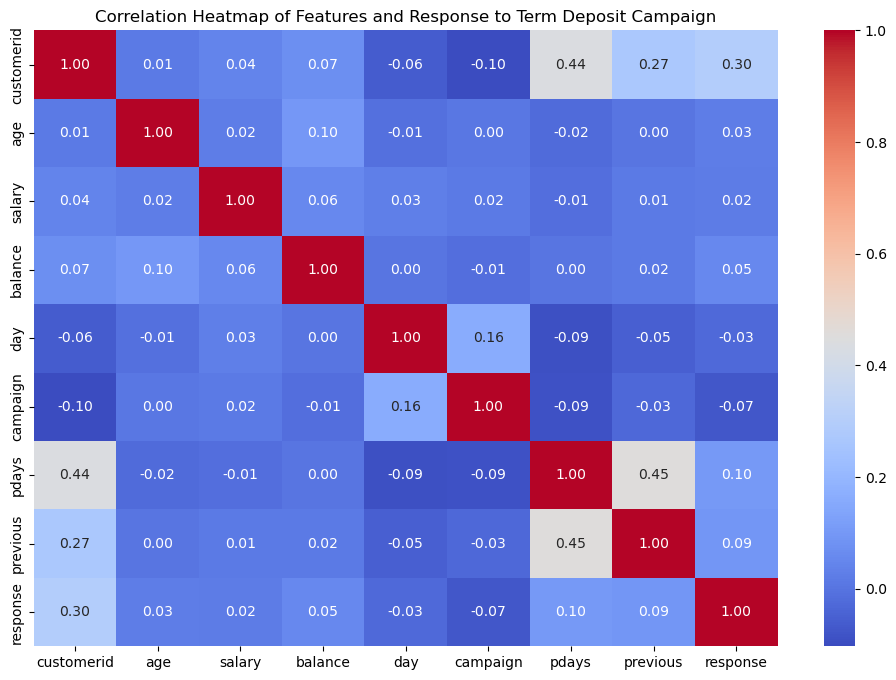

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = TeleMarketingAnalysis.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features and Response to Term Deposit Campaign')
plt.show()

5. CATEGORICAL VARIABLE ANALYSIS
a. Investigate the distribution of categorical variables such as job type,
education, and marital status.


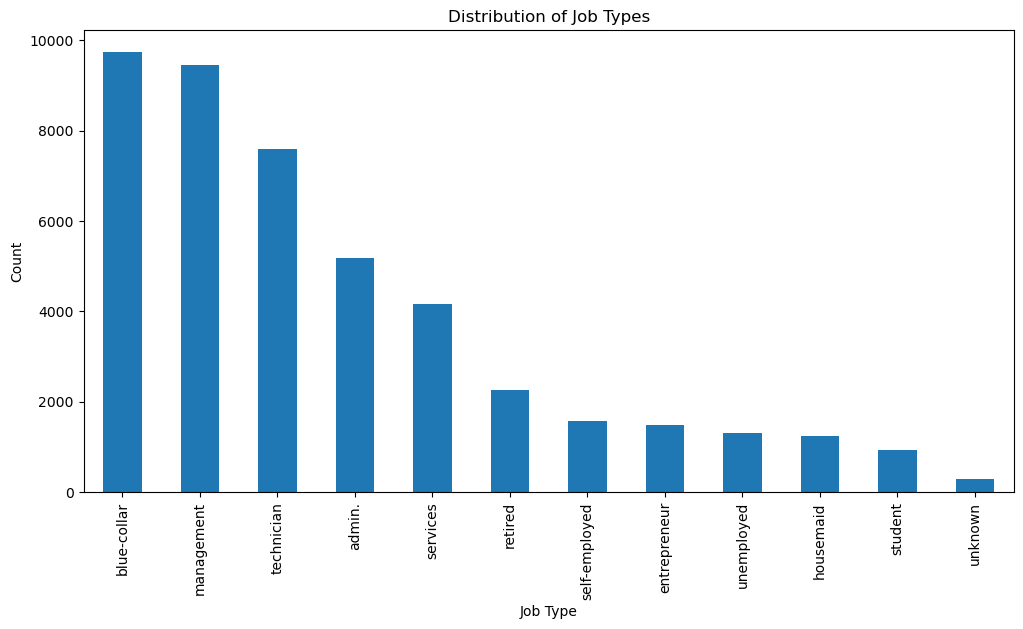

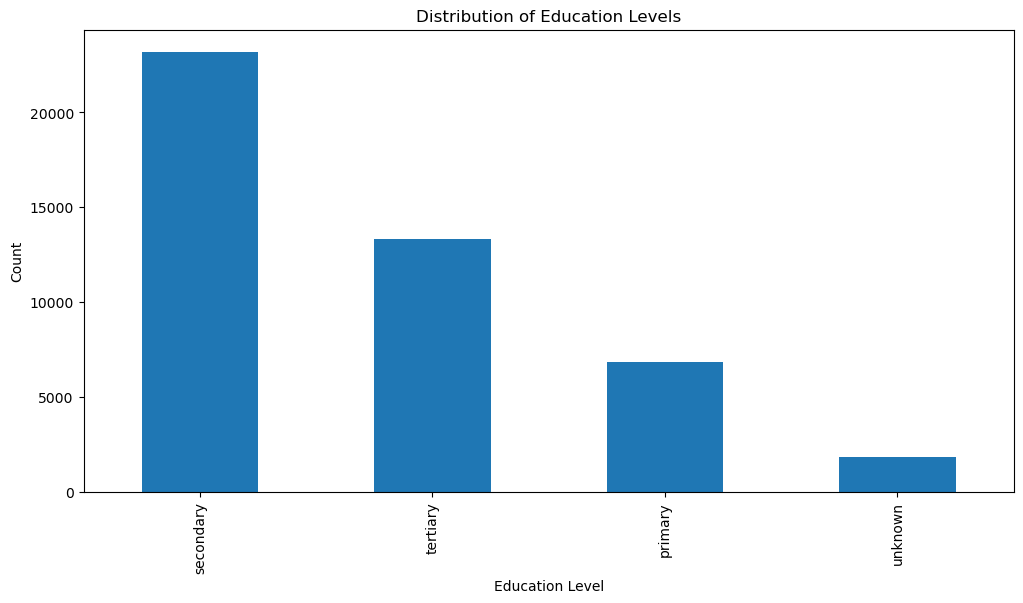

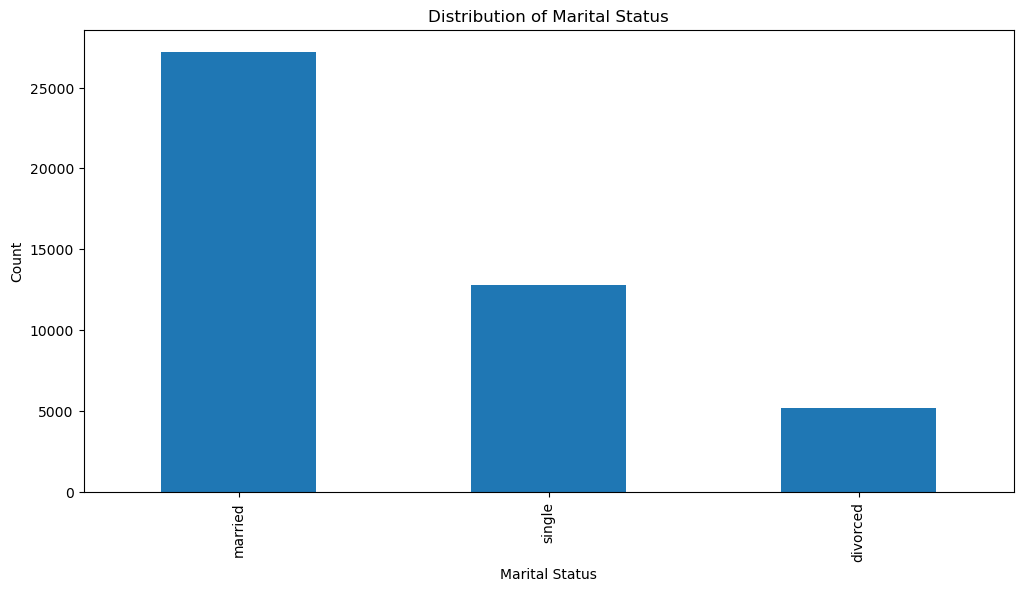

In [17]:
import matplotlib.pyplot as plt

# Distribution of job types
plt.figure(figsize=(12, 6))
TeleMarketingAnalysis['job'].value_counts().plot(kind='bar')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Distribution of Job Types')
plt.show()

# Distribution of education levels
plt.figure(figsize=(12, 6))
TeleMarketingAnalysis['education'].value_counts().plot(kind='bar')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()

# Distribution of marital status
plt.figure(figsize=(12, 6))
TeleMarketingAnalysis['marital'].value_counts().plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')
plt.show()

b. Assess the impact of these categorical variables on the campaign's
success through visualizations like bar charts.

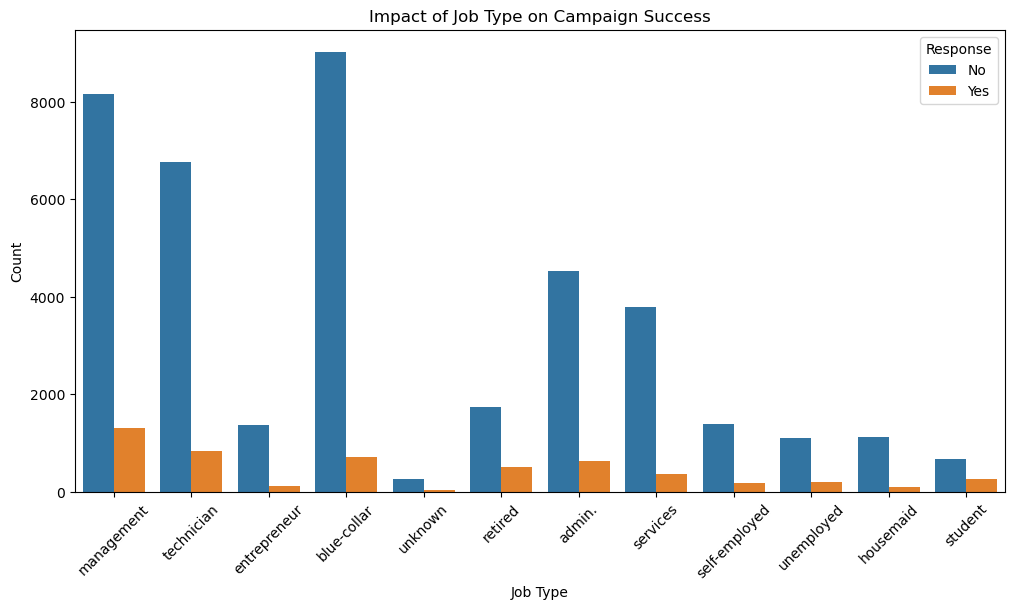

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Impact of job type on campaign success
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='response', data=TeleMarketingAnalysis)
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Impact of Job Type on Campaign Success')
plt.legend(title='Response', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

In [19]:
TeleMarketingAnalysis.head()

,customerid,age,salary,balance,marital,job,education,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,management,tertiary,yes,no,yes,no,unknown,5,2017-05-01,261 sec,1,-1,0,unknown,0.0
1,2,44.0,60000,29,single,technician,secondary,yes,no,yes,no,unknown,5,2017-05-01,151 sec,1,-1,0,unknown,0.0
2,3,33.0,120000,2,married,entrepreneur,secondary,yes,no,yes,yes,unknown,5,2017-05-01,76 sec,1,-1,0,unknown,0.0
3,4,47.0,20000,1506,married,blue-collar,unknown,no,no,yes,no,unknown,5,2017-05-01,92 sec,1,-1,0,unknown,0.0
4,5,33.0,0,1,single,unknown,unknown,no,no,no,no,unknown,5,2017-05-01,198 sec,1,-1,0,unknown,0.0


6. TEMPORAL ANALYSIS
a. Investigate temporal patterns in the success of the campaign over time.
b. Analyze if specific months or days exhibit superior campaign
performance.


In [20]:
TeleMarketingAnalysis.rename(columns = {'month':'date'}, inplace = True)

In [21]:
TeleMarketingAnalysis.head()

,customerid,age,salary,balance,marital,job,education,targeted,default,housing,loan,contact,day,date,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,management,tertiary,yes,no,yes,no,unknown,5,2017-05-01,261 sec,1,-1,0,unknown,0.0
1,2,44.0,60000,29,single,technician,secondary,yes,no,yes,no,unknown,5,2017-05-01,151 sec,1,-1,0,unknown,0.0
2,3,33.0,120000,2,married,entrepreneur,secondary,yes,no,yes,yes,unknown,5,2017-05-01,76 sec,1,-1,0,unknown,0.0
3,4,47.0,20000,1506,married,blue-collar,unknown,no,no,yes,no,unknown,5,2017-05-01,92 sec,1,-1,0,unknown,0.0
4,5,33.0,0,1,single,unknown,unknown,no,no,no,no,unknown,5,2017-05-01,198 sec,1,-1,0,unknown,0.0


In [22]:
import pandas as pd

# Convert the 'date' column to datetime format
if 'date' in TeleMarketingAnalysis.columns:
    TeleMarketingAnalysis['date'] = pd.to_datetime(TeleMarketingAnalysis['date'])

# Extract month and day of the week from the 'date' column
if 'date' in TeleMarketingAnalysis.columns:
    TeleMarketingAnalysis['month'] = TeleMarketingAnalysis['date'].dt.month
    TeleMarketingAnalysis['day_of_week'] = TeleMarketingAnalysis['date'].dt.day_name()

In [23]:
TeleMarketingAnalysis.head()

,customerid,age,salary,balance,marital,job,education,targeted,default,housing,...,day,date,duration,campaign,pdays,previous,poutcome,response,month,day_of_week
0,1,58.0,100000,2143,married,management,tertiary,yes,no,yes,...,5,2017-05-01,261 sec,1,-1,0,unknown,0.0,5.0,Monday
1,2,44.0,60000,29,single,technician,secondary,yes,no,yes,...,5,2017-05-01,151 sec,1,-1,0,unknown,0.0,5.0,Monday
2,3,33.0,120000,2,married,entrepreneur,secondary,yes,no,yes,...,5,2017-05-01,76 sec,1,-1,0,unknown,0.0,5.0,Monday
3,4,47.0,20000,1506,married,blue-collar,unknown,no,no,yes,...,5,2017-05-01,92 sec,1,-1,0,unknown,0.0,5.0,Monday
4,5,33.0,0,1,single,unknown,unknown,no,no,no,...,5,2017-05-01,198 sec,1,-1,0,unknown,0.0,5.0,Monday


In [24]:
TeleMarketingAnalysis.round(0)

,customerid,age,salary,balance,marital,job,education,targeted,default,housing,...,day,date,duration,campaign,pdays,previous,poutcome,response,month,day_of_week
0,1,58.0,100000,2143,married,management,tertiary,yes,no,yes,...,5,2017-05-01,261 sec,1,-1,0,unknown,0.0,5.0,Monday
1,2,44.0,60000,29,single,technician,secondary,yes,no,yes,...,5,2017-05-01,151 sec,1,-1,0,unknown,0.0,5.0,Monday
2,3,33.0,120000,2,married,entrepreneur,secondary,yes,no,yes,...,5,2017-05-01,76 sec,1,-1,0,unknown,0.0,5.0,Monday
3,4,47.0,20000,1506,married,blue-collar,unknown,no,no,yes,...,5,2017-05-01,92 sec,1,-1,0,unknown,0.0,5.0,Monday
4,5,33.0,0,1,single,unknown,unknown,no,no,no,...,5,2017-05-01,198 sec,1,-1,0,unknown,0.0,5.0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,technician,tertiary,yes,no,no,...,17,2017-11-01,16.2833333333333 min,3,-1,0,unknown,1.0,11.0,Wednesday
45207,45208,71.0,55000,1729,divorced,retired,primary,yes,no,no,...,17,2017-11-01,7.6 min,2,-1,0,unknown,1.0,11.0,Wednesday
45208,45209,72.0,55000,5715,married,retired,secondary,yes,no,no,...,17,2017-11-01,18.7833333333333 min,5,184,3,success,1.0,11.0,Wednesday
45209,45210,57.0,20000,668,married,blue-collar,secondary,yes,no,no,...,17,2017-11-01,8.46666666666667 min,4,-1,0,unknown,0.0,11.0,Wednesday


In [26]:
TeleMarketingAnalysis.fillna(-1, inplace=True)
TeleMarketingAnalysis['age']=TeleMarketingAnalysis['age'].astype(int)
TeleMarketingAnalysis['month']=TeleMarketingAnalysis['month'].astype(int)

In [27]:
TeleMarketingAnalysis.head()

,customerid,age,salary,balance,marital,job,education,targeted,default,housing,...,day,date,duration,campaign,pdays,previous,poutcome,response,month,day_of_week
0,1,58,100000,2143,married,management,tertiary,yes,no,yes,...,5,2017-05-01 00:00:00,261 sec,1,-1,0,unknown,0.0,5,Monday
1,2,44,60000,29,single,technician,secondary,yes,no,yes,...,5,2017-05-01 00:00:00,151 sec,1,-1,0,unknown,0.0,5,Monday
2,3,33,120000,2,married,entrepreneur,secondary,yes,no,yes,...,5,2017-05-01 00:00:00,76 sec,1,-1,0,unknown,0.0,5,Monday
3,4,47,20000,1506,married,blue-collar,unknown,no,no,yes,...,5,2017-05-01 00:00:00,92 sec,1,-1,0,unknown,0.0,5,Monday
4,5,33,0,1,single,unknown,unknown,no,no,no,...,5,2017-05-01 00:00:00,198 sec,1,-1,0,unknown,0.0,5,Monday


In [28]:
TeleMarketingAnalysis['response']=TeleMarketingAnalysis['response'].astype(int)

In [29]:
TeleMarketingAnalysis.head()

,customerid,age,salary,balance,marital,job,education,targeted,default,housing,...,day,date,duration,campaign,pdays,previous,poutcome,response,month,day_of_week
0,1,58,100000,2143,married,management,tertiary,yes,no,yes,...,5,2017-05-01 00:00:00,261 sec,1,-1,0,unknown,0,5,Monday
1,2,44,60000,29,single,technician,secondary,yes,no,yes,...,5,2017-05-01 00:00:00,151 sec,1,-1,0,unknown,0,5,Monday
2,3,33,120000,2,married,entrepreneur,secondary,yes,no,yes,...,5,2017-05-01 00:00:00,76 sec,1,-1,0,unknown,0,5,Monday
3,4,47,20000,1506,married,blue-collar,unknown,no,no,yes,...,5,2017-05-01 00:00:00,92 sec,1,-1,0,unknown,0,5,Monday
4,5,33,0,1,single,unknown,unknown,no,no,no,...,5,2017-05-01 00:00:00,198 sec,1,-1,0,unknown,0,5,Monday


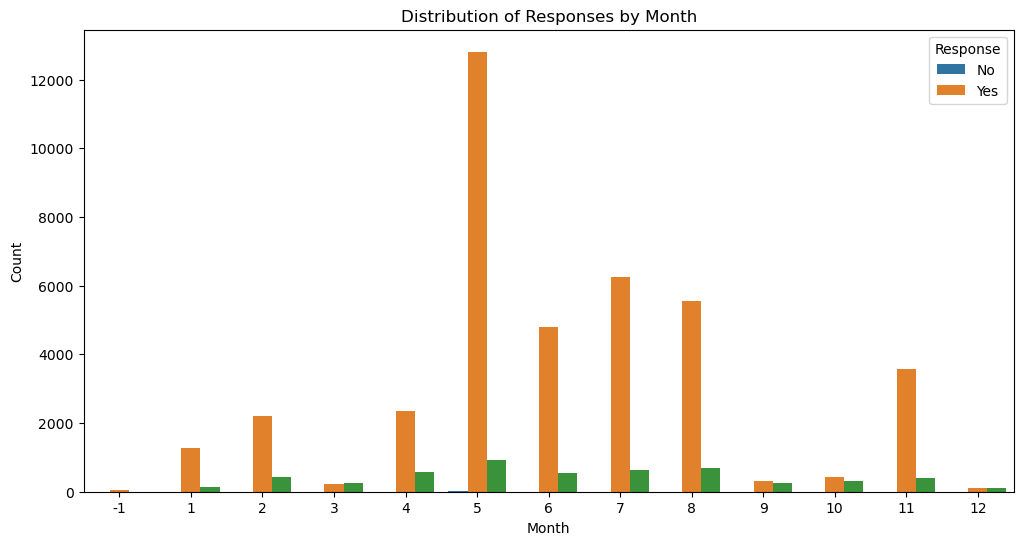

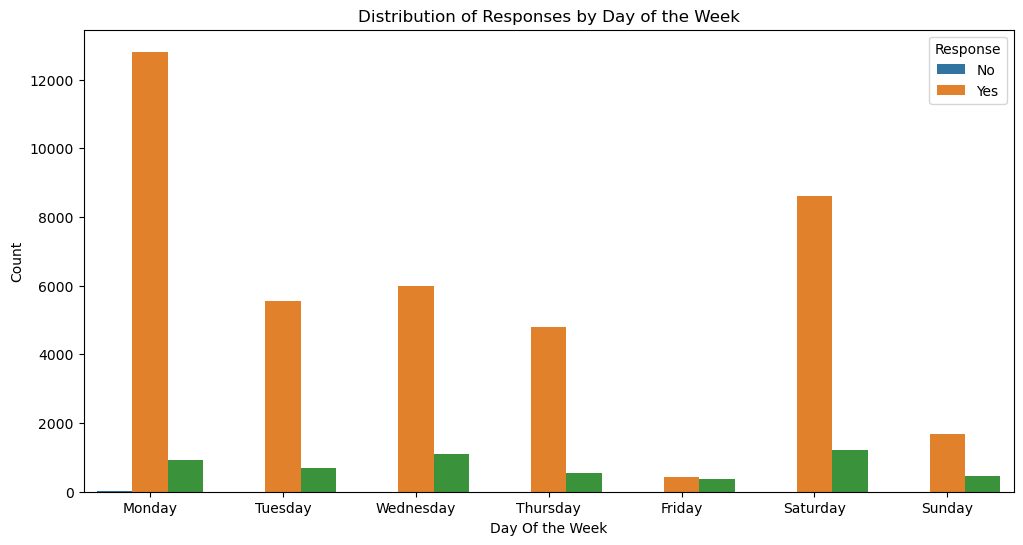

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of responses by month
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='response', data=TeleMarketingAnalysis)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Responses by Month')
plt.legend(title='Response', loc='upper right', labels=['No', 'Yes'])
plt.show()
#Distribution of responses bt Day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', hue='response', data=TeleMarketingAnalysis,order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'])
plt.xlabel('Day Of the Week')
plt.ylabel('Count')
plt.title('Distribution of Responses by Day of the Week')
plt.legend(title='Response', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [33]:
print(TeleMarketingAnalysis['day_of_week'].unique())

['Monday' -1 'Thursday' 'Saturday' 'Tuesday' 'Sunday' 'Wednesday' 'Friday']


7. FEATURE ENGINEERING
a. Introduce new features that may enhance prediction, such as creating age
groups or income categories.
b. Apply encoding techniques to transform categorical variables if
necessary.


In [34]:
# Create age groups
bins = [0, 30, 40, 50, 60, 70, 120]
labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71+']
TeleMarketingAnalysis['age_group'] = pd.cut(TeleMarketingAnalysis['age'], bins=bins, labels=labels, right=False)

# Create income categories
income_bins = [0, 30000, 60000, 90000, 120000, 150000, 200000]
income_labels = ['0-30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '150k+']
TeleMarketingAnalysis['income_category'] = pd.cut(TeleMarketingAnalysis['salary'], bins=income_bins, labels=income_labels, right=False)

# Apply encoding techniques to transform categorical variables
TeleMarketingAnalysis_encoded = pd.get_dummies(TeleMarketingAnalysis, columns=['age_group', 'income_category'])
print(TeleMarketingAnalysis_encoded.head())

   customerid  age  salary  balance  marital           job  education  \
0           1   58  100000     2143  married    management   tertiary   
1           2   44   60000       29   single    technician  secondary   
2           3   33  120000        2  married  entrepreneur  secondary   
3           4   47   20000     1506  married   blue-collar    unknown   
4           5   33       0        1   single       unknown    unknown   

  targeted default housing  ... age_group_41-50 age_group_51-60  \
0      yes      no     yes  ...               0               1   
1      yes      no     yes  ...               1               0   
2      yes      no     yes  ...               0               0   
3       no      no     yes  ...               1               0   
4       no      no      no  ...               0               0   

   age_group_61-70 age_group_71+ income_category_0-30k  \
0                0             0                     0   
1                0             0          

In [35]:
TeleMarketingAnalysis_encoded.head()

,customerid,age,salary,balance,marital,job,education,targeted,default,housing,...,age_group_41-50,age_group_51-60,age_group_61-70,age_group_71+,income_category_0-30k,income_category_30k-60k,income_category_60k-90k,income_category_90k-120k,income_category_120k-150k,income_category_150k+
0,1,58,100000,2143,married,management,tertiary,yes,no,yes,...,0,1,0,0,0,0,0,1,0,0
1,2,44,60000,29,single,technician,secondary,yes,no,yes,...,1,0,0,0,0,0,1,0,0,0
2,3,33,120000,2,married,entrepreneur,secondary,yes,no,yes,...,0,0,0,0,0,0,0,0,1,0
3,4,47,20000,1506,married,blue-collar,unknown,no,no,yes,...,1,0,0,0,1,0,0,0,0,0
4,5,33,0,1,single,unknown,unknown,no,no,no,...,0,0,0,0,1,0,0,0,0,0


8. CORRELATION ANALYSIS
a. Examine correlations between independent variables to identify
multicollinearity.
b. Evaluate how correlated features may influence the target variable.

In [36]:
# Calculate the correlation matrix for the independent variables
corr_matrix = TeleMarketingAnalysis.drop('response', axis=1).corr()

# Display the correlation matrix
print(corr_matrix)

            customerid       age    salary   balance       day  campaign  \
customerid    1.000000  0.015296  0.039966  0.073639 -0.061465 -0.102884   
age           0.015296  1.000000  0.024260  0.097616 -0.009212  0.004842   
salary        0.039966  0.024260  1.000000  0.055469  0.027864  0.015005   
balance       0.073639  0.097616  0.055469  1.000000  0.004503 -0.014578   
day          -0.061465 -0.009212  0.027864  0.004503  1.000000  0.162490   
campaign     -0.102884  0.004842  0.015005 -0.014578  0.162490  1.000000   
pdays         0.437729 -0.024335 -0.014968  0.003435 -0.093044 -0.088628   
previous      0.271098  0.000743  0.014564  0.016674 -0.051710 -0.032855   
month         0.021226  0.092532  0.099170  0.093649  0.101841  0.053795   

               pdays  previous     month  
customerid  0.437729  0.271098  0.021226  
age        -0.024335  0.000743  0.092532  
salary     -0.014968  0.014564  0.099170  
balance     0.003435  0.016674  0.093649  
day        -0.093044 -0.

C:\Users\pabba\AppData\Local\Temp\ipykernel_18768\3959970737.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = TeleMarketingAnalysis.drop('response', axis=1).corr()


In [37]:
# Identify multicollinearity by looking for correlation values close to 1 or -1
highly_correlated = corr_matrix[(corr_matrix > 0.8) & (corr_matrix < 1.0)]

print(highly_correlated)

            customerid  age  salary  balance  day  campaign  pdays  previous  \
customerid         NaN  NaN     NaN      NaN  NaN       NaN    NaN       NaN   
age                NaN  NaN     NaN      NaN  NaN       NaN    NaN       NaN   
salary             NaN  NaN     NaN      NaN  NaN       NaN    NaN       NaN   
balance            NaN  NaN     NaN      NaN  NaN       NaN    NaN       NaN   
day                NaN  NaN     NaN      NaN  NaN       NaN    NaN       NaN   
campaign           NaN  NaN     NaN      NaN  NaN       NaN    NaN       NaN   
pdays              NaN  NaN     NaN      NaN  NaN       NaN    NaN       NaN   
previous           NaN  NaN     NaN      NaN  NaN       NaN    NaN       NaN   
month              NaN  NaN     NaN      NaN  NaN       NaN    NaN       NaN   

            month  
customerid    NaN  
age           NaN  
salary        NaN  
balance       NaN  
day           NaN  
campaign      NaN  
pdays         NaN  
previous      NaN  
month         NaN  

9. Outlier Detection and Handling
a. Identify and rectify outliers that could impact the analysis and predictions.


In [38]:
# Display the head of the dataframe to get an overview
outliers = TeleMarketingAnalysis.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T
outliers

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
customerid,45211.0,22606.000000,13051.435847,1.0,11303.5,22606.0,33908.5,40690.0,42950.5,44758.9,45211.0
age,45211.0,40.917100,10.653408,-1.0,33.0,39.0,48.0,56.0,59.0,71.0,95.0
salary,45211.0,57006.171065,32085.718415,0.0,20000.0,60000.0,70000.0,100000.0,100000.0,120000.0,120000.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,3574.0,5768.0,13164.9,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,28.0,29.0,31.0,31.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,5.0,8.0,16.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,185.0,317.0,370.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,2.0,3.0,8.9,275.0
response,45211.0,0.116277,0.322624,-1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
month,45211.0,6.136936,2.418717,-1.0,5.0,6.0,8.0,10.0,11.0,11.0,12.0


In [50]:
# Check for missing values in the 'age', 'month', and 'response' columns
TeleMarketingAnalysis[['age', 'month', 'response']].isnull().sum()

age         0
month       0
response    0
dtype: int64

In [ ]:
# Handling outliers

# Define a function to handle outliers using IQR method

def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered

# Apply the function to handle outliers in the 'age' column
data_filtered_age = handle_outliers_iqr(dataframe, 'age')

# Apply the function to handle outliers in the 'salary' column 

# data_filtered_salary = handle_outliers_iqr(dataframe, 'salary')

# Display the head of the filtered data
filtered_data_head = data_filtered_age.head()
filtered_data_head

In [41]:
print(TeleMarketingAnalysis['age_group'])
print(TeleMarketingAnalysis['income_category'])

0        51-60
1        41-50
2        31-40
3        41-50
4        31-40
         ...  
45206    51-60
45207      71+
45208      71+
45209    51-60
45210    31-40
Name: age_group, Length: 45211, dtype: category
Categories (6, object): ['0-30' < '31-40' < '41-50' < '51-60' < '61-70' < '71+']
0         90k-120k
1          60k-90k
2        120k-150k
3            0-30k
4            0-30k
           ...    
45206      60k-90k
45207      30k-60k
45208      30k-60k
45209        0-30k
45210    120k-150k
Name: income_category, Length: 45211, dtype: category
Categories (6, object): ['0-30k' < '30k-60k' < '60k-90k' < '90k-120k' < '120k-150k' < '150k+']
